In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Github/dsKal100

/content/drive/MyDrive/Github/dsKal100


In [3]:
!ls

 cs-231n-python-colab.ipynb   lec
 disc			      other
 grad_proj		      proj
 hw			     'python-tutorial for cs231n Stanford.ipynb'
 lab			      README.md


In [4]:
%cd lec/lec07
!ls

/content/drive/MyDrive/Github/dsKal100/lec/lec07
baby.csv  lec7.ipynb


## Lecture 7 – Data 100, Spring 2022

by Josh Hug

adapted from material by Ani Adhikari, Suraj Rampure, and Fernando Pérez.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
%matplotlib inline

In [7]:
births = pd.read_csv('baby.csv')

In [8]:
plt.rcParams["hist.bins"]

10

In [9]:
births.head()

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,120,284,27,62,100,False
1,113,282,33,64,135,False
2,128,279,28,64,115,True
3,108,282,23,67,125,True
4,136,286,25,62,93,False


In [10]:
births.shape

(1174, 6)

## Bar Plots

We often use bar plots to display distributions of a categorical variable:

In [11]:
births['Maternal Smoker'].value_counts()

False    715
True     459
Name: Maternal Smoker, dtype: int64

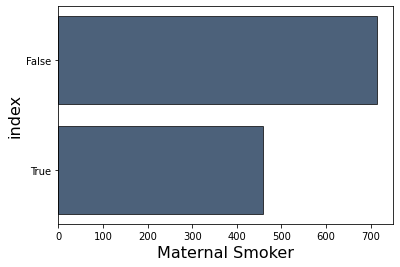

In [28]:
from datascience import Table
t = Table.from_df(births['Maternal Smoker'].value_counts().reset_index())
t.barh("index", "Maternal Smoker")

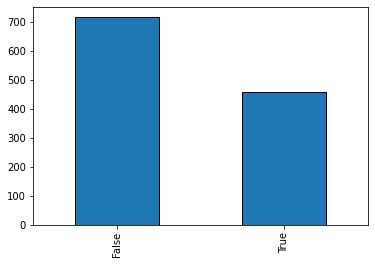

In [29]:
# Using the plot method with Series
births['Maternal Smoker'].value_counts().plot(kind = 'bar');

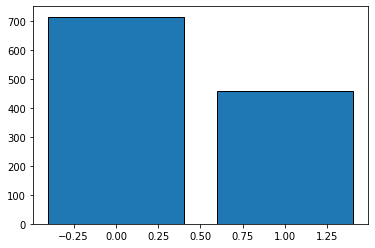

In [30]:
# Using matplotlib

ms = births['Maternal Smoker'].value_counts();
plt.bar(ms.index, ms)
plt.show()

Note: putting a semicolon after a plot call hides all of the unnecessary text that comes after it (the `<matplotlib.axes_....>`).

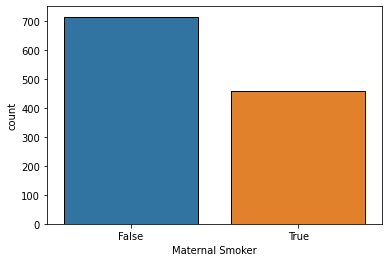

In [31]:
# Using seaborn -- better interface
sns.countplot(data = births, x = 'Maternal Smoker');

In [32]:
# Using plotly

import plotly.express as px
px.histogram(births, x = 'Maternal Smoker', color = 'Maternal Smoker')

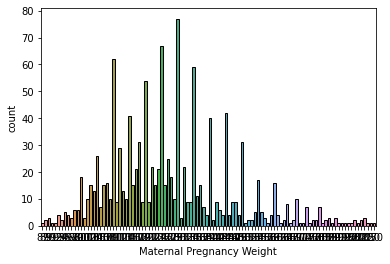

In [33]:
sns.countplot(data = births, x = 'Maternal Pregnancy Weight');

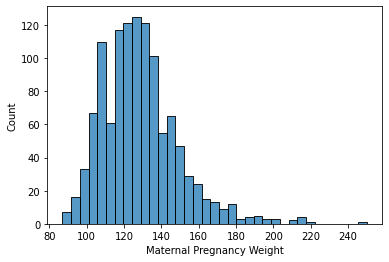

In [34]:
sns.histplot(data = births, x = 'Maternal Pregnancy Weight')

In [35]:
px.histogram(births, x = 'Maternal Pregnancy Weight')

In [36]:
fig = px.histogram(births, x = "Maternal Pregnancy Weight")
fig.update_traces(marker_line_width = 1, marker_line_color = "white")

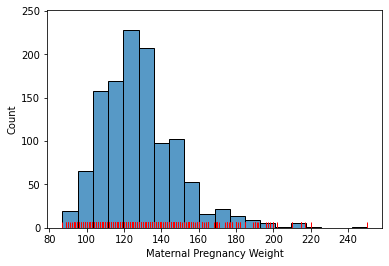

In [37]:
sns.histplot(data = births, x = 'Maternal Pregnancy Weight', bins = 20);
sns.rugplot(data = births, x = 'Maternal Pregnancy Weight', color = "red");

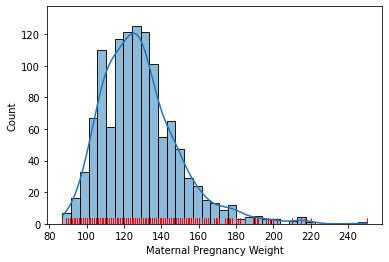

In [38]:
sns.histplot(data = births, x = 'Maternal Pregnancy Weight', kde = True);
sns.rugplot(data = births, x = 'Maternal Pregnancy Weight', color = "red");

## Box Plots

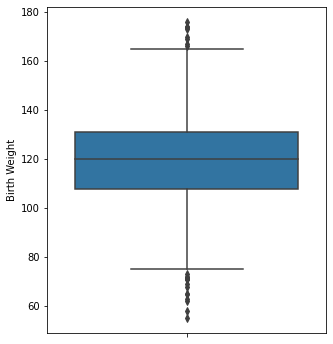

In [40]:
#plt.figure() sets the parameters for sns plots, not for plotly
plt.figure(figsize = (5, 6))
sns.boxplot(y = "Birth Weight", data = births);

In [42]:
px.box(data_frame=births, y = "Birth Weight")

In [47]:
# How to change figure size for plotly express

fig = px.box(births, y = "Birth Weight")


fig.update_layout(
    autosize=False,
    width=300,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4))

In [48]:
bweights = births["Birth Weight"]
q1 = np.percentile(bweights, 25)
q2 = np.percentile(bweights, 50)
q3 = np.percentile(bweights, 75)
iqr = q3 - q1
whisk1 = q1 - 1.5*iqr
whisk2 = q3 + 1.5*iqr

whisk1, q1, q2, q3, whisk2

(73.5, 108.0, 120.0, 131.0, 165.5)

## Violin Plots

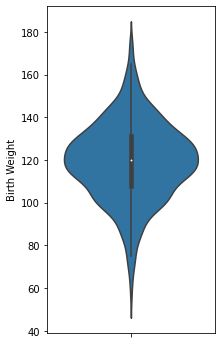

In [49]:
plt.figure(figsize = (3, 6))
sns.violinplot(y=births["Birth Weight"]);

## Side by side box plots and violin plots

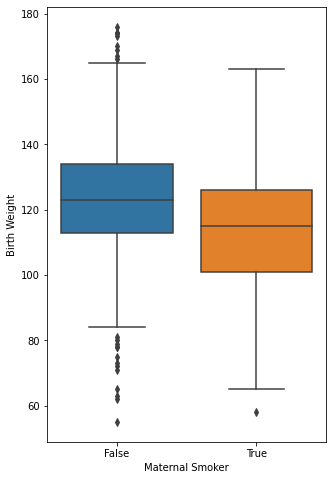

In [50]:
plt.figure(figsize=(5, 8))
sns.boxplot(data=births, x = 'Maternal Smoker', y = 'Birth Weight');

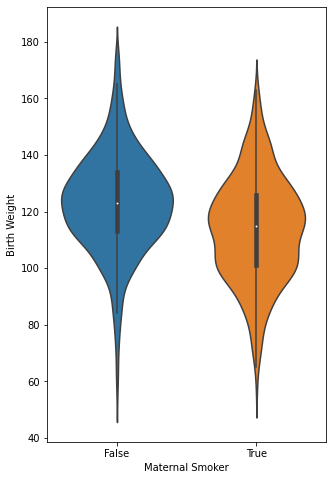

In [51]:
plt.figure(figsize=(5, 8))
sns.violinplot(data=births, x = 'Maternal Smoker', y = 'Birth Weight');

## Scatter plots

In [52]:
births.head()

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,120,284,27,62,100,False
1,113,282,33,64,135,False
2,128,279,28,64,115,True
3,108,282,23,67,125,True
4,136,286,25,62,93,False


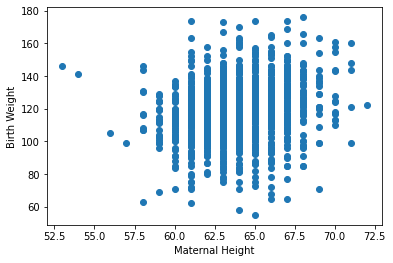

In [53]:
plt.scatter(births['Maternal Height'], births['Birth Weight']);
plt.xlabel('Maternal Height')
plt.ylabel('Birth Weight');

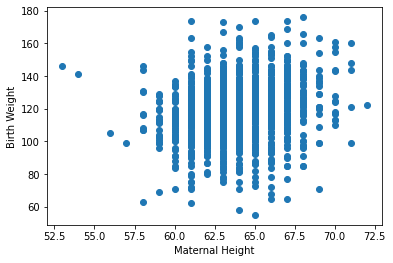

In [54]:
plt.scatter(data=births, x='Maternal Height', y='Birth Weight');
plt.xlabel('Maternal Height')
plt.ylabel('Birth Weight');

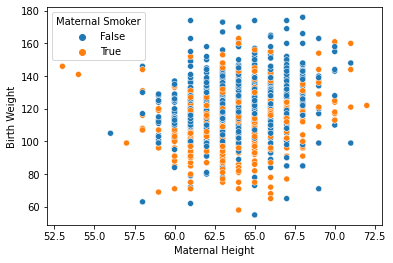

In [55]:
sns.scatterplot(data = births, x = 'Maternal Height', y = 'Birth Weight', hue = 'Maternal Smoker');

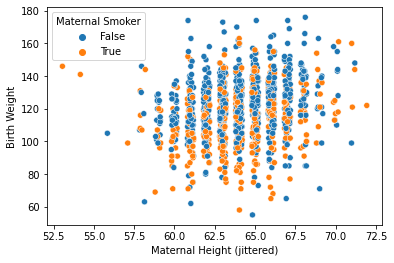

In [56]:
births["Maternal Height (jittered)"] = births["Maternal Height"] + np.random.uniform(-0.2, 0.2, len(births))
fig = sns.scatterplot(data = births, x = 'Maternal Height (jittered)', y = 'Birth Weight', hue = 'Maternal Smoker');

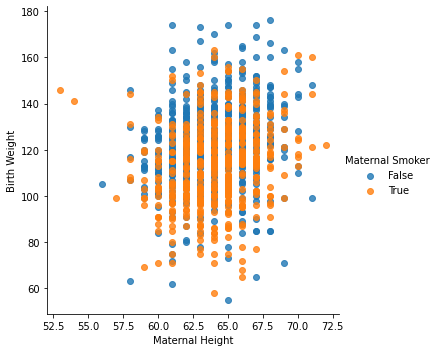

In [59]:
sns.lmplot(data = births, x = 'Maternal Height', y = 'Birth Weight', ci=False, hue='Maternal Smoker', fit_reg=True);  #fit_reg=False hides the regression line

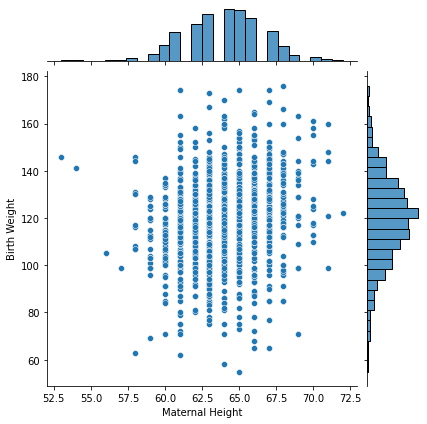

In [60]:
sns.jointplot(data = births, x = 'Maternal Height', y = 'Birth Weight');

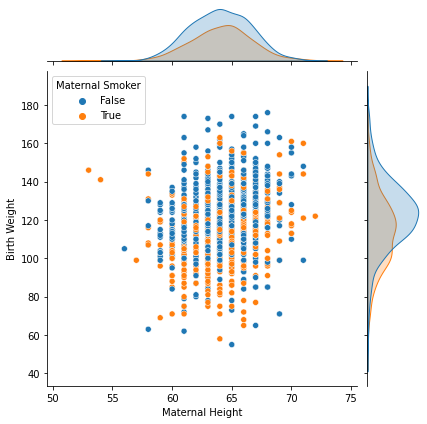

In [61]:
sns.jointplot(data = births, x = 'Maternal Height', y = 'Birth Weight', hue='Maternal Smoker');

## Hex plots and contour plots

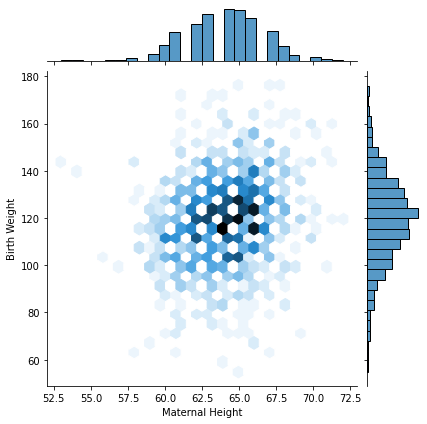

In [62]:
sns.jointplot(data = births, x = 'Maternal Height', y = 'Birth Weight', kind='hex');

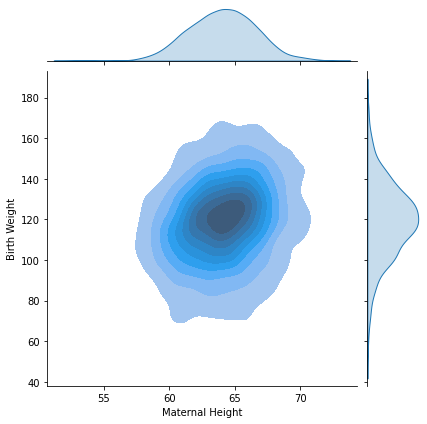

In [65]:
sns.jointplot(data = births, x = 'Maternal Height', y = 'Birth Weight', kind='kde', fill=True);  #fill=False removes the fill and leaves only lines

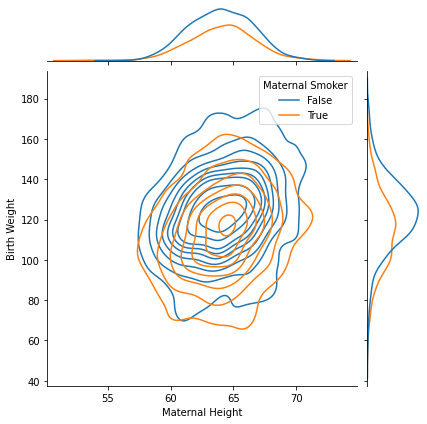

In [66]:
sns.jointplot(data = births, x = 'Maternal Height', y = 'Birth Weight', kind='kde', hue='Maternal Smoker');

## Bonus

Calling the DataFrame `.plot()` method results in weird things!

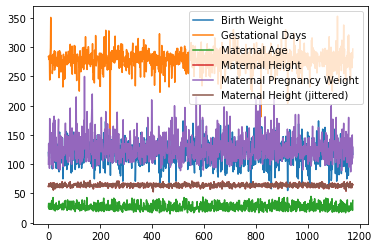

In [67]:
births.plot();